**PROJECT OVERVIEW**

In a highly competitive retail environment, personalization is essential for engaging customers effectively. By segmenting customers based on metrics like total spending, purchase frequency, and quantity of items purchased, this project identifies unique groups within the customer base. Each group, or segment, represents a different type of shopper, from occasional high-spenders to frequent low-spenders, enabling the business to tailor its engagement and marketing efforts accordingly.



# Data Preparation and Exploratory Data Analysis (EDA)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

In [ ]:
data = pd.read_csv('/content/Online Retail.csv')

In [ ]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279510 entries, 0 to 279509
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    279510 non-null  object 
 1   StockCode    279510 non-null  object 
 2   Description  278493 non-null  object 
 3   Quantity     279509 non-null  float64
 4   InvoiceDate  279509 non-null  object 
 5   UnitPrice    279509 non-null  float64
 6   CustomerID   199683 non-null  float64
 7   Country      279509 non-null  object 
dtypes: float64(3), object(5)
memory usage: 17.1+ MB
None


In [ ]:
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  279509.000000  279509.000000  199683.000000
mean        9.316119       5.030682   15288.495000
std       207.373000     113.170445    1729.986186
min    -74215.000000       0.000000   12346.000000
25%         1.000000       1.250000   13862.000000
50%         3.000000       2.100000   15157.000000
75%        10.000000       4.150000   16838.000000
max     74215.000000   38970.000000   18287.000000


In [ ]:
print(data.isnull().sum())

InvoiceNo          0
StockCode          0
Description     1017
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     79827
Country            1
dtype: int64


In [ ]:
# Drop rows where CustomerID is missing
data = data.dropna(subset=['CustomerID'])
data = data[data['Quantity'] > 0]  # Removing negative quantities, assuming they're returns
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']  # New column for total spend per transaction

<ipython-input-5-9422448fcb2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSpend'] = data['Quantity'] * data['UnitPrice']  # New column for total spend per transaction


# Feature Selection

In [ ]:
#Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'InvoiceNo' : 'nunique', #Count of unique invoices; transactional frequency
    'Quantity' : 'sum' #Total quantity purchased
}).reset_index() # Call the reset_index() method

In [ ]:
#Rename columns for better understanding
customer_data.columns = ['CustomerID', 'TotalSpend', 'Frequency', 'TotalQuantity']
customer_data.head()

,CustomerID,TotalSpend,Frequency,TotalQuantity
0,12346.0,77183.60,1,74215
1,12347.0,2790.86,5,1590
2,12348.0,1487.24,3,2124
3,12350.0,334.40,1,197
4,12352.0,1561.81,5,254


# Clustering Analysis

In [ ]:
#Standardize features before clustering
scaler = StandardScaler()
x_scaled = scaler.fit_transform(customer_data[['TotalSpend', 'Frequency', 'TotalQuantity']])

In [ ]:
#Using Elbow curve to find the optimal number of cluster
inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)

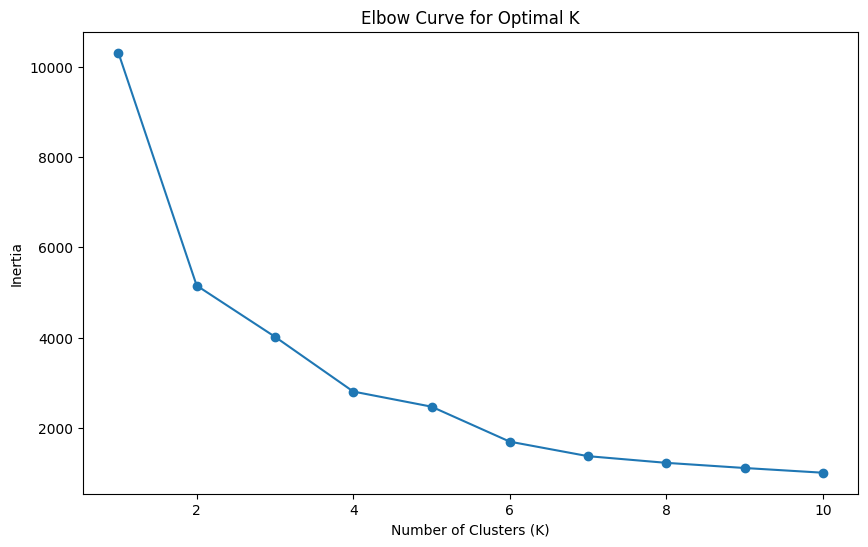

In [ ]:
#Plot the Elbow Curve
plt.figure(figsize = (10,6))
plt.plot(range(1,11), inertia, marker = 'o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Fit K-Means with the optimal number of clusters, say k= 4 based on the elbow curve
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state = 0)
customer_data['Cluster']= kmeans.fit_predict(x_scaled)

# Visualizations

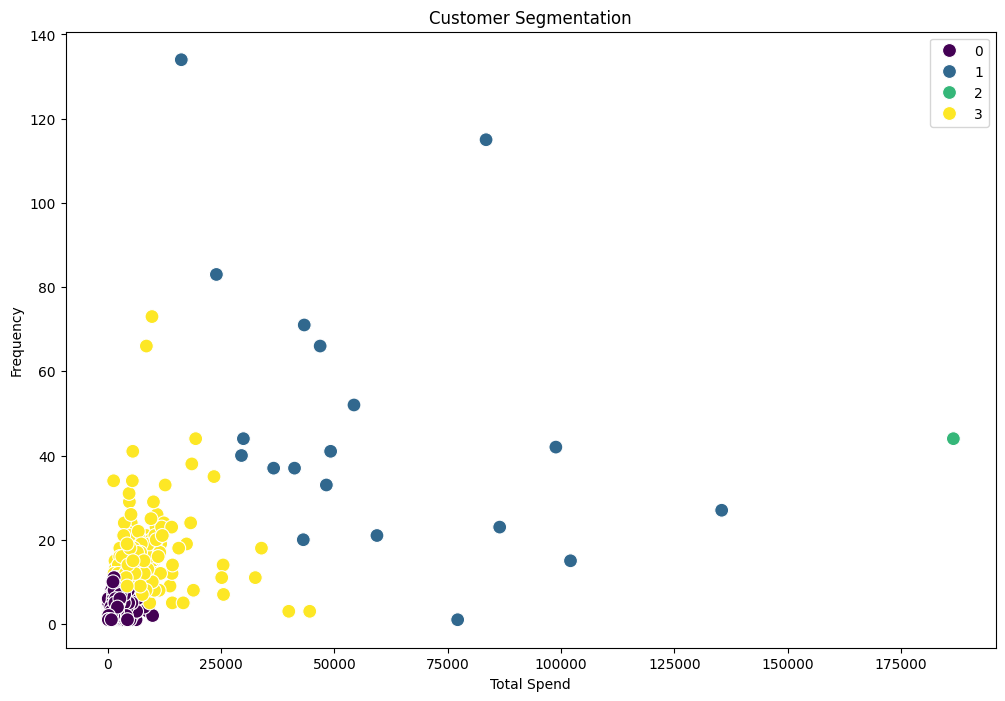

In [ ]:
#Visualizing clusters using scatter plot
plt.figure(figsize = (12,8))
sns.scatterplot(data = customer_data, x = 'TotalSpend', y = 'Frequency', hue = 'Cluster', palette = 'viridis', s = 100)
plt.title('Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.legend()
plt.show()